In [3]:
import rbmpy.sampler

In [4]:
from scipy.special import expit
from rbmpy.rbm import RBM
from rbmpy.sampler import VanillaSampler, PartitionedSampler, ApproximatedSampler, LayerWiseApproxSampler,ApproximatedMulDimSampler
from rbmpy.trainer import VanillaTrainier, ORBMTrainer
from rbmpy.performance import Result
from collections import Counter
import numpy as np
import rbmpy.datasets as datasets
import rbmpy.performance, pickle, rbmpy.rbm, os, math, logging

import rbmpy.plotter as pp
from rbmpy.datasets import SquareToyData
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

logger = logging.getLogger()
# Set the logging level to logging.DEBUG 
logger.setLevel(logging.INFO)

%matplotlib inline

In [5]:
def key_for_visible(v):
    return "{}".format(v)

def goodnight(model, sampler, hours_of_sleep, num_gibbs_per_hour):
    """Generate a dictionary of reconstructions to the number of times they occurred"""
    result_dict = Counter()
    v_prime = sampler.dream(model, num_gibbs_per_hour)
    reconstruction_dict = {} # the actual reconstructions that occurred
    for i in range(hours_of_sleep):
        v_prime = sampler.dream(model, num_gibbs_per_hour)
        result_dict[key_for_visible(v_prime)] += 1
        reconstruction_dict[key_for_visible(v_prime)] = v_prime
    return result_dict, reconstruction_dict


def image_composition(a, b):
    return a + b

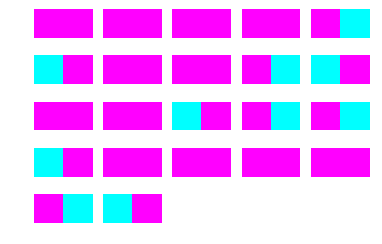

Dataset of 1 by 2 with 22 items


In [6]:
square_factory = SquareToyData()
sq_shape = (1,1)
img_size = (1,2)
dataset_one = square_factory.gen_training(sq_shape, img_size)
dataset_two = np.copy(dataset_one)

np.random.shuffle(dataset_one)
np.random.shuffle(dataset_two)

dataset_composite = image_composition(dataset_one, dataset_two)
for i in range(10):
    np.random.shuffle(dataset_one)
    np.random.shuffle(dataset_two)

    dataset_composite = np.append(dataset_composite, image_composition(dataset_one , dataset_two), axis=0)

np.append(dataset_composite,dataset_one[:5],axis= 0)
pp.images(dataset_composite, color_range=(0,1))

print("Dataset of {1} by {2} with {0} items".format(*dataset_composite.shape))


In [7]:
(num_items, num_vis ) = datasets.squash_images(dataset_composite).shape
num_hid = 2

In [8]:
rbm_a = RBM(num_hid, num_vis,num_items)
rbm_b = RBM(num_hid, num_vis,num_items)

In [9]:
sampler = ApproximatedMulDimSampler(rbm_a.weights ,rbm_b.weights, rbm_a.hidden_bias, rbm_b.hidden_bias)
trainer = ORBMTrainer(rbm_a,rbm_b, sampler)

In [10]:
trainer.train(int(1e2),datasets.squash_images(dataset_composite), logging_freq=10)

INFO:rbmpy.trainer:Created Progress logger for task - rbmpy.trainer
INFO:rbmpy.trainer:0.0% complete
INFO:rbmpy.trainer:10.0% complete
INFO:rbmpy.trainer:20.0% complete
INFO:rbmpy.trainer:30.0% complete
INFO:rbmpy.trainer:40.0% complete
INFO:rbmpy.trainer:50.0% complete
INFO:rbmpy.trainer:60.0% complete
INFO:rbmpy.trainer:70.0% complete
INFO:rbmpy.trainer:80.0% complete
INFO:rbmpy.trainer:90.0% complete
INFO:rbmpy.trainer:100% complete


pp.images(rbm.weights_into_hiddens(rbm_a.weights), title="Hinton Diagram", cmap="gray")
pp.images(rbm.weights_into_hiddens(rbm_b.weights), title="Hinton Diagram", cmap="gray")

INFO:root:Ground Truth


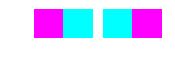

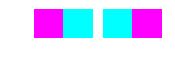

In [11]:
sampler_a = VanillaSampler(rbm_a)
sampler_b = VanillaSampler(rbm_b)

logging.info("Ground Truth")
pp.images(dataset_one)
pp.images(dataset_two)

logging.info("A")
pp.images(datasets.inflate_images(sampler_a.reconstruction_given_visible(datasets.squash_images(dataset_one))))
pp.images(datasets.inflate_images(sampler_a.reconstruction_given_visible(datasets.squash_images(dataset_two))))
logging.info("B")
pp.images(datasets.inflate_images(sampler_b.reconstruction_given_visible(datasets.squash_images(dataset_one))))
pp.images(datasets.inflate_images(sampler_b.reconstruction_given_visible(datasets.squash_images(dataset_two))))

pp.images(dataset_composite, color_range=(0,1))

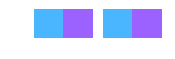

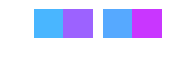

In [12]:
pp.images(sampler_a.reconstruction_given_visible(datasets.squash_images(dataset_one), return_sigmoid=True).reshape(2,1,2), color_range=(0,1))
pp.images(sampler_a.reconstruction_given_visible(datasets.squash_images(dataset_two), return_sigmoid=True).reshape(2,1,2), color_range=(0,1))

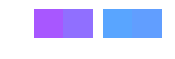

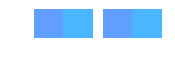

In [13]:
pp.images(sampler_b.reconstruction_given_visible(datasets.squash_images(dataset_one), return_sigmoid=True).reshape(2,1,2) , color_range=(0,1))
pp.images(sampler_b.reconstruction_given_visible(datasets.squash_images(dataset_two), return_sigmoid=True).reshape(2,1,2) , color_range=(0,1)) 